# Ejercicio:

>**1.** En cada jugada se lanza una moneda no alterada en repetidas ocasiones hasta que la diferencia entre el número de caras y cruces que aprecen sea tres.

> **2.** Si decide participar, debe pagar un dólar cada vez que se lanza la moneda. No puede abandonar el juego hasta que éste acaba.

> **3.** Se reciben 8 dólares al final de cada juego. 





In [39]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [40]:
def juego():
    nro_juegos = 10000
    partidas = 0
    vec_ganancias = np.zeros(nro_juegos)
    vec_vueltas = np.zeros(nro_juegos)
    vec_caras = np.zeros(nro_juegos)
    vec_secas = np.zeros(nro_juegos)

    while partidas < nro_juegos:
        nro_caras = 0
        nro_secas = 0
        nro_lanzamientos = 0
        while (nro_caras - nro_secas) < 3 and (nro_caras-nro_secas) > -3:
            var_al_unif = random()      # 0 o 1
            if var_al_unif < 0.5:
                nro_caras += 1
            else:
                nro_secas += 1
            nro_lanzamientos += 1
        Ganancia = 8 - nro_lanzamientos

        ### Para cada partida guardo los datos en el vector:
        vec_ganancias[partidas] = Ganancia
        vec_vueltas[partidas] = nro_lanzamientos
        vec_caras[partidas] = nro_caras
        vec_secas[partidas] = nro_secas

        partidas += 1
    return vec_ganancias, vec_vueltas, vec_caras, vec_secas

La función ***juego()*** simula un numero específico de partidas del juego propuesto por el ejercicio. Al final de cada juego se computa la ganancia y se guardan todos los datos en vectores. Al terminar con todos los juegos se devuelven los vectores con los datos guardados.

In [41]:
def crear_tabla(vec_ganancias, vec_lanzamientos, vec_caras, vec_secas):
    dataset = pd.DataFrame({'Caras': vec_caras, 'Secas': vec_secas, 'Nro_Lanzamientos': vec_lanzamientos,
                            'Ganancias': vec_ganancias})
    dataset.index = np.arange(1, len(dataset)+1)  # Hago que el index empiece en 1 y no en 0 por comodidad.
    dataset.index.names = ['Partida']  # Cambio el nombre al index por Partida.
    muestra_visual = dataset.loc[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000], :]  # Tabla de visualización
    print(muestra_visual)

    return dataset  # Devuelvo el DataFrame (tabla) creado

**crear_tabla()** como su nombre lo indica crea el *DataFrame* que se utilizará para almacenar todos los datos sustraídos de los juegos.

In [42]:
def mostrar_promedios(df):
    promedios = df.agg('mean', axis='rows')
    df_promedios = pd.DataFrame(promedios)
    df_promedios.columns = ['Promedios']
    print(df_promedios)

A partir del *DataFrame* se muestra el promedio del total de todos sus atributos.

Se puede observar que en promedio siempre estaremos perdiendo dinero $ -1±0.2 $ dólares. Es decir la media del número de lanzamientos es de **9 lanzamientos** por juego.

In [43]:
def crear_graficos(df):

    df4 = df.groupby(['Nro_Lanzamientos'])  # Separo los datos según el número de lanzamientos totales.
    NFilas = np.zeros(len(df4))
    vec_lanzamientos = np.zeros(len(df4))
    NCol = np.zeros(len(df4))
    i = 0
    for g, gf in df4:
        gf.reindex()  # Problemas al llamar a index de otra forma a números enteros. Reset.
        NFilas[i], NCol[i] = gf.shape  # Número de veces que obtuve el mismo nro de lanzamientos.
        vec_lanzamientos[i] = g  # Valor númerico de esos lanzamientos.
        i += 1

    df_ocurrencias_lanzamientos = pd.DataFrame(
        {
            'nro_tiradas': vec_lanzamientos,
            'ocurrencias': NFilas
        }
    )
    df_ocurrencias_lanzamientos.set_index('nro_tiradas', inplace=True)

    plt.subplot(121)
    plt.bar(vec_lanzamientos, NFilas)
    plt.title('Ocurrencias de Nro de Lanzamientos', loc='right')
    plt.ylabel('Ocurrencias')
    plt.xlabel('Nro_tiradas')

    plt.subplot(122)
    plt.bar(df.index, df['Nro_Lanzamientos'])
    plt.title('Tiradas en cada partida', loc='right')
    plt.ylabel('Nro tiradas')
    plt.xlabel('Partidas')
    plt.show()

Con esta función se crean 2 gráficos. Uno muestra el número de ocurrencias del número de lanzamientos ocurridos en un juego. El otro muestra el número de lanzamientos de todas las partidas. 

Se puede observar que en el primer gráficos obtenemos una distribución exponencial de los resultados. Es más frecuente que el juego termine en pocas jugadas a que se alargue mucho.  

> **Por último tenemos al main del programa que se encarga de comenzar el juego y llamar al resto de funciones.**

         Caras  Secas  Nro_Lanzamientos  Ganancias
Partida                                           
1          3.0    0.0               3.0        5.0
2          6.0    3.0               9.0       -1.0
3          3.0    6.0               9.0       -1.0
4          5.0    8.0              13.0       -5.0
5          1.0    4.0               5.0        3.0
6         10.0    7.0              17.0       -9.0
7          3.0    0.0               3.0        5.0
8          0.0    3.0               3.0        5.0
9          5.0    2.0               7.0        1.0
10         5.0    8.0              13.0       -5.0
100        1.0    4.0               5.0        3.0
1000       1.0    4.0               5.0        3.0
                  Promedios
Caras                4.5317
Secas                4.4633
Nro_Lanzamientos     8.9950
Ganancias           -0.9950


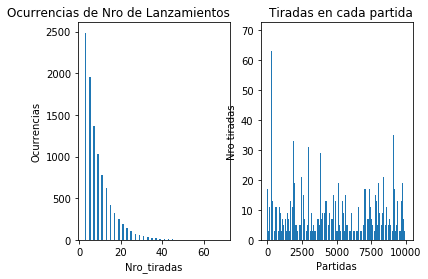

In [44]:
############################   Main del programa  #########################################

# Los vectores conseguidos en la función 'juego()' se las ingreso a la función 'crear tabla'
a, b, c, d = juego()
df = crear_tabla(a, b, c, d)
mostrar_promedios(df)
crear_graficos(df)